In [35]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 
from sklearn.cluster import KMeans

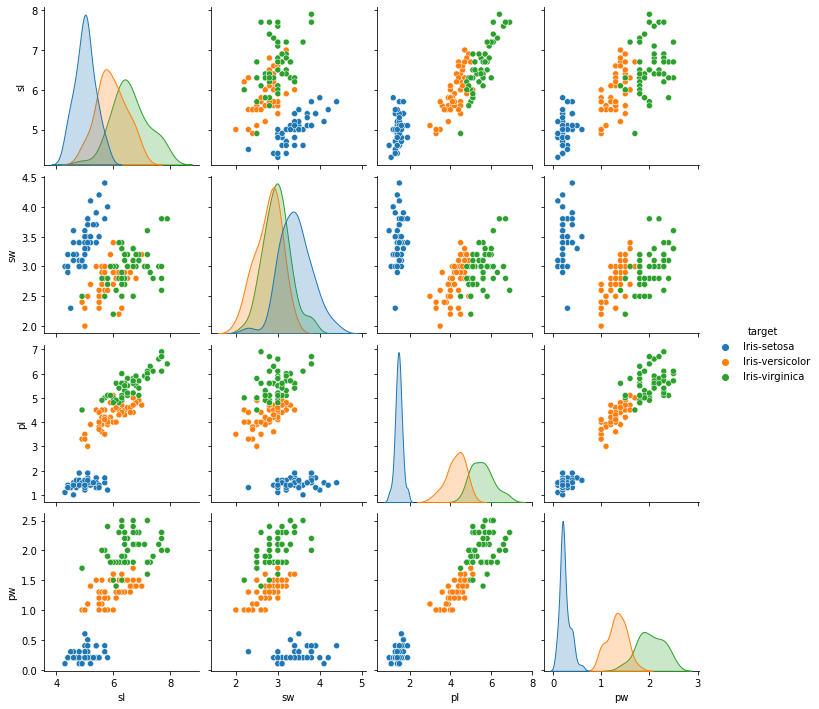

In [36]:
df = pd.read_csv('/home/iris.data', names= ['sl', 'sw', 'pl', 'pw', 'target'])
sb.pairplot(df, hue= 'target')

In [37]:
#axis=1 indica que vamos pegar uma coluna e não uma linha 
caracteristicas = np.array(df.drop('target', axis=1))

#random_state evita nas próximas vezes reduzir as aleatoriedades #forçando o algoritmo a criar centróides próximos das últimas vezes 
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(caracteristicas) #treinando o algoritmo

KMeans(n_clusters=3, random_state=0)

In [43]:
def soma_quadrados_intra_clusters(dataset):

  wcss = [] 
  for n in range(2, 21):
    kmeans = KMeans(n_clusters=n) 
    kmeans.fit(dataset) 
    wcss.append(kmeans.inertia_)

  return wcss

Text(0, 0.5, 'Soma dos quadrados intra-clusters ')

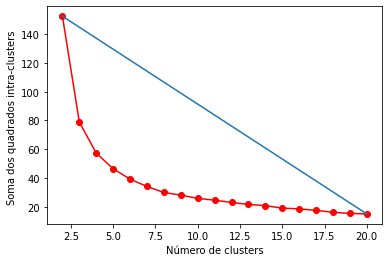

In [47]:
n_clusters = list(range(2,21))
somas = soma_quadrados_intra_clusters(caracteristicas)
plt.plot(n_clusters, somas, '-o', color="red") 
plt.plot([2,20], [somas [0], somas[-1]])
plt.xlabel ("Número de clusters") 
plt.ylabel("Soma dos quadrados intra-clusters ")

In [54]:
def numero_otimo_clusters(wcss):
  import math 
  x0 = 2 
  y0 = wcss[0] 
  x1 = 20 
  y1 = wcss[-1]

  distancias = []

  for i in range (len (wcss)):
    x = i+2 
    y = wcss[i] 
    numerador = abs((y1-y0) * x - (x1-x0) * y + x1 * y0 - y1*x0) 
    denominador = math.sqrt((y1 - y0) ** 2 + (x1 - x0) **2) 
    distancias.append(numerador/denominador)
  return distancias.index(max(distancias))

In [55]:
k_otimo = numero_otimo_clusters(somas)
print('Melhor numero de clusters possiveis:', k_otimo)

Melhor numero de clusters possiveis: 3
